In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %reload_ext autoreload

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as io

import filters
import homography
import rectification
import utils
import mops, harris

# Detect Corners

In [4]:
im1 = utils.read_img("data/plush1.jpg")
im2 = utils.read_img("data/plush2.jpg")
im1_gray = utils.read_img("data/plush1.jpg", gray=True)
im2_gray = utils.read_img("data/plush2.jpg", gray=True)

/Users/aprilsin/GitHub/cs194-proj5/harris.py:21: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  coords = corner_peaks(h, min_distance=2, indices=True)


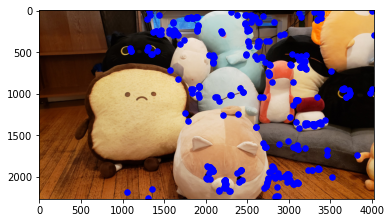

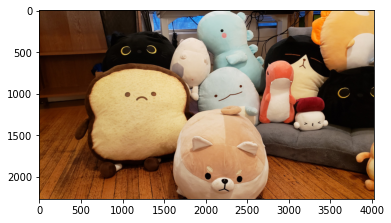

In [5]:
strength1, corners1 = harris.get_corners(im1_gray)
c1 = mops.detect_corners(im1)
utils.plot_corners(im1, corners1)
utils.plot_corners(im1, c1)

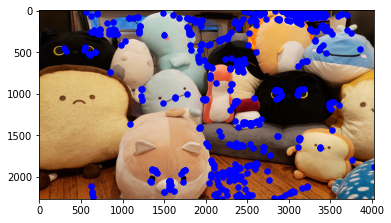

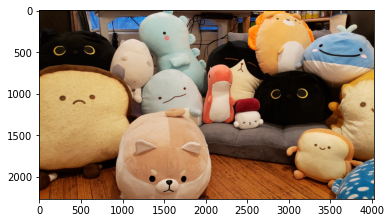

In [63]:
strength2, corners2 = harris.get_corners(im2_gray)
c2 = mops.detect_corners(im2)
utils.plot_corners(im2, corners2)
utils.plot_corners(im2, c2)

# Do Adaptive Non-Maximal Suppression

In [62]:
strength1

array([[0.11643633, 0.11654548, 0.0354982 , ..., 0.47563592, 1.56212733,
        1.56288962],
       [0.11722127, 0.13552272, 0.05207861, ..., 0.68933574, 1.80190254,
        1.56516049],
       [0.03598296, 0.05244563, 0.0368364 , ..., 0.48222092, 0.69158269,
        0.47670853],
       ...,
       [0.16065069, 0.2353539 , 0.16574493, ..., 0.1095084 , 0.1543608 ,
        0.10072779],
       [0.5275617 , 0.61356629, 0.23819548, ..., 0.14455028, 0.37045725,
        0.31367563],
       [0.52528433, 0.52966725, 0.16449795, ..., 0.09732897, 0.31775054,
        0.31373639]])

In [ ]:
detected_corners = corners1
for corner in detected_corners:
    s = harris_strength[corner]
    pass

In [29]:
from skimage.feature import corner_harris, corner_peaks
square = np.zeros([10, 10])
square[2:8, 2:9] = 1

In [30]:
square.astype(int)
# corner_peaks(corner_harris(square), min_distance=1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [37]:
# square.astype(int)
corners = corner_peaks(corner_harris(square), min_distance=1)
corners

array([[2, 2],
       [2, 8],
       [7, 2],
       [7, 8]])

In [33]:
corner_harris(square).shape

(10, 10)

In [42]:
corners

array([[2, 2],
       [2, 8],
       [7, 2],
       [7, 8]])

In [43]:
im = np.zeros_like(square)
im[corners[:, 0], corners[:, 1]] = 1

In [44]:
im

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

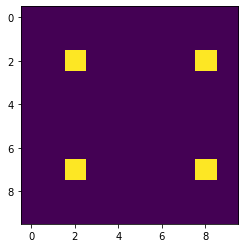

In [45]:
plt.imshow(im)

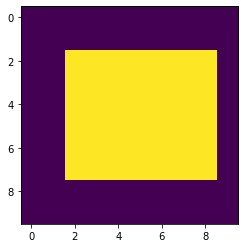

In [35]:
plt.imshow(square)